In [5]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *

Updating fastai...
Done.


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [0]:
BASE = "/content/drive/My Drive/fastai-v3/data/petadoption"

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir(BASE + "/train_images"))

# Any results you write to the current directory are saved as output.

In [0]:

#!KAGGLE_USERNAME=gdoteof KAGGLE_KEY=##### kaggle competitions download -c petfinder-adoption-prediction


In [9]:
!ls -l /content
!mkdir -p "{BASE}"


total 8
lrwxrwxrwx 1 root root   18 Mar 20 21:03 data -> /root/.fastai/data
drwxr-xr-x 3 root root 4096 Mar 20 21:37 dir_001
drwx------ 3 root root 4096 Mar 20 22:51 drive
lrwxrwxrwx 1 root root   19 Mar 20 21:03 models -> /root/.torch/models


In [10]:
!ls -l "{BASE}"

total 2045772
drwx------ 2 root root       4096 Mar 20 21:59 models
drwx------ 2 root root       4096 Mar 20 21:22 test
drwx------ 2 root root       4096 Mar 20 18:56 test_images
-rw------- 1 root root  410128757 Mar 20 18:35 test_images.zip
drwx------ 2 root root       4096 Mar 20 19:03 test_metadata
-rw------- 1 root root   14602132 Mar 20 18:35 test_metadata.zip
drwx------ 2 root root       4096 Mar 20 19:07 test_sentiment
-rw------- 1 root root    3254800 Mar 20 18:35 test_sentiment.zip
-rw------- 1 root root     643897 Mar 20 18:35 test.zip
drwx------ 2 root root       4096 Mar 20 20:24 train
drwx------ 2 root root       4096 Mar 20 20:23 train_images
-rw------- 1 root root 1595336815 Mar 20 18:35 train_images.zip
drwx------ 2 root root       4096 Mar 20 19:10 train_metadata
-rw------- 1 root root   56196604 Mar 20 18:35 train_metadata.zip
drwx------ 2 root root       4096 Mar 20 20:14 train_sentiment
-rw------- 1 root root   11878318 Mar 20 18:35 train_sentiment.zip
-rw------- 1 

In [0]:
#!mv train* "{BASE}"
#!mv test*  "{BASE}"

**My Code**

In [0]:
f = "train_sentiment"

In [0]:
!mkdir -p "{BASE}/{f}"
#!unzip -q "{BASE}/{f}.zip" -d "{BASE}/{f}"

In [14]:
!echo "{BASE}/test"
!ls -l "{BASE}/test"

/content/drive/My Drive/fastai-v3/data/petadoption/test
total 1884
-rw------- 1 root root   47396 Dec 26 19:17 sample_submission.csv
-rw------- 1 root root 1881101 Dec 26 19:17 test.csv


In [0]:
from fastai import *
from fastai.vision import *
from fastai.tabular import *

In [0]:
path = Path(BASE)


In [0]:
path_train_img = path/'train_images';
path_test_img = path/'test_images';
path_train = path/'train';
path_test = path/'test'; 
path_train_sentiment = path/'train_sentiment';
path_test_sentiment = path/'test_sentiment';


# Can we predict adoptions just from pictures?

In [0]:
train_imgs = path_train_img.ls()
 

In [0]:
df_img = pd.DataFrame(columns=['Image'], data=path_train_img.ls())

In [0]:
#df_img

In [21]:
df_img['Image'] = df_img['Image'].astype(np.str).replace(to_replace='/content/drive/My Drive/fastai-v3/data/petadoption/',value='./', regex=True)
df_img.head()

,Image
0,./train_images/ce0294cec-3.jpg
1,./train_images/2f4c6ada3-1.jpg
2,./train_images/d4ec04b8e-19.jpg
3,./train_images/326c9c979-5.jpg
4,./train_images/c670993fc-14.jpg


In [0]:
df_tab = pd.read_csv(path_train/'train.csv')

In [23]:
df_tab.head().transpose()

,0,1,2,3,4
Type,2,2,1,1,1
Name,Nibble,No Name Yet,Brisco,Miko,Hunter
Age,3,1,1,4,1
Breed1,299,265,307,307,307
Breed2,0,0,0,0,0
Gender,1,1,1,2,1
Color1,1,1,2,1,1
Color2,7,2,7,2,0
Color3,0,0,0,0,0
MaturitySize,1,2,2,2,2


PetID is the lookup(?) for the images.

In [24]:
def getIdFromImgPath(x):  return re.search('.*\/(\w*)', str(x), re.IGNORECASE).group(1)
"sloppily converts path to string, then pulls the id out"
path2 = df_img.iloc[0].Image
print(path2)
print(getIdFromImgPath(df_img.iloc[0].Image))

./train_images/ce0294cec-3.jpg
ce0294cec


So, now we need to use the img id to associate each image with an adoption speed

In [0]:
df_img['petId'] = df_img['Image'].map(getIdFromImgPath)

In [26]:
df_img.head().transpose()

,0,1,2,3,4
Image,./train_images/ce0294cec-3.jpg,./train_images/2f4c6ada3-1.jpg,./train_images/d4ec04b8e-19.jpg,./train_images/326c9c979-5.jpg,./train_images/c670993fc-14.jpg
petId,ce0294cec,2f4c6ada3,d4ec04b8e,326c9c979,c670993fc


In [27]:
df_tab.head().transpose()

,0,1,2,3,4
Type,2,2,1,1,1
Name,Nibble,No Name Yet,Brisco,Miko,Hunter
Age,3,1,1,4,1
Breed1,299,265,307,307,307
Breed2,0,0,0,0,0
Gender,1,1,1,2,1
Color1,1,1,2,1,1
Color2,7,2,7,2,0
Color3,0,0,0,0,0
MaturitySize,1,2,2,2,2


In [28]:
def getAdoptionSpeed(petId): return (df_tab.loc[df_tab['PetID'] == petId]['AdoptionSpeed']).item()

petid = df_img.iloc[0].petId
print(petid)
getAdoptionSpeed(petid)

ce0294cec


3

In [0]:
df_img['adoptionSpeed'] = df_img['petId'].map(getAdoptionSpeed)

In [0]:
df_img['name'] = df_img['Image']

In [0]:
df_img['label'] = df_img['adoptionSpeed']

In [0]:
del df_img['Image']

In [0]:
del df_img['adoptionSpeed']

In [0]:
del df_img['petId']

In [35]:
df_img.head()

,name,label
0,./train_images/ce0294cec-3.jpg,3
1,./train_images/2f4c6ada3-1.jpg,3
2,./train_images/d4ec04b8e-19.jpg,4
3,./train_images/326c9c979-5.jpg,3
4,./train_images/c670993fc-14.jpg,1


In [0]:
def get_label(path): 
  return getAdoptionSpeed(getIdFromImgPath(path))

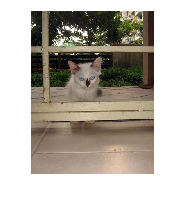

In [37]:
img = open_image(path/df_img.loc[2421]['name'])
img.show()

In [38]:
!ls -alh "{BASE}/{df_img.loc[8103]['name']}"

-rw------- 1 root root 44K Dec 21 06:24 '/content/drive/My Drive/fastai-v3/data/petadoption/./train_images/93c9866b0-10.jpg'


In [0]:
tfms = get_transforms()
bs=512
"Had to set num_worksers=0 to get around an error with kaggle's runtime"
data = ImageDataBunch.from_df(BASE,df_img, ds_tfms=tfms, size=128, bs=bs, num_workers=4).normalize(imagenet_stats)

In [41]:
!/opt/bin/nvidia-smi


Wed Mar 20 22:59:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    26W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [71]:
#!ps aux | grep python 

root          33  0.1  0.4 190780 63372 ?        Sl   21:02   0:11 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root        1993  7.5 17.9 41693752 2391448 ?    Ssl  22:13   2:44 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-3d920225-b3b3-4249-994f-338973204660.json
root        2009  0.0  0.1  54376 14716 ?        S    22:13   0:00 /usr/bin/python3 -Wignore:::pip._internal.cli.base_command -c from multiprocessing.semaphore_tracker import main;main(72)
root        2266  3.5  0.0      0     0 ?        Z    22:36   0:28 [python3] <defunct>
root        2267  3.4  0.0      0     0 ?        Z    22:36   0:27 [python3] <defunct>
root        2268  3.5  0.0      0     0 ?        Z    22:36   0:28 [python3] <defunct>
root        2269  3.5  0.0      0     0 ?        Z    22:36   0:27 [python3] <defunct>
root        2341  0.0  0.0  39196  6408 ?     

In [0]:
#!kill -9 1993

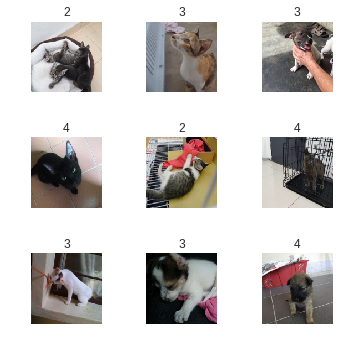

In [42]:

data.show_batch(rows=3,figsize=(5,5))

In [0]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,kappa])

In [45]:

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.0.1.post2
True
True


In [46]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,1.553741,1.418301,0.674327,0.205063,1:19:29


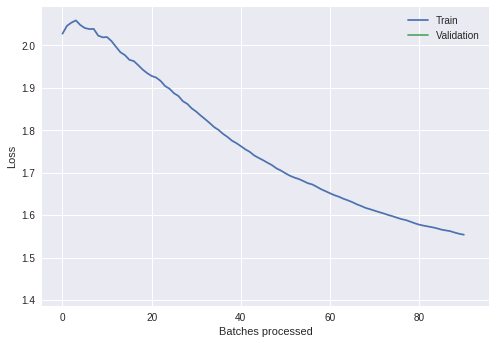

In [48]:
learn.recorder.plot_losses()

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


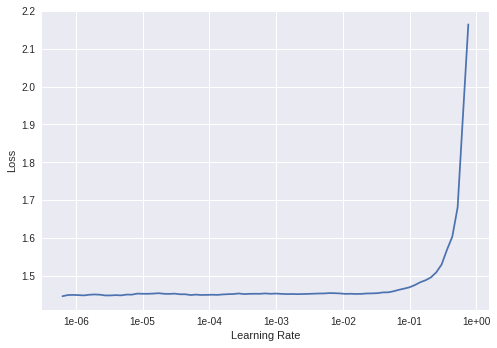

In [50]:
learn.recorder.plot()


# Can we fit it any better?

In [51]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,1.455230,1.417969,0.675184,0.202684,12:59
1,1.451701,1.417019,0.674498,0.203103,12:31
2,1.451476,1.416872,0.674584,0.202470,13:10


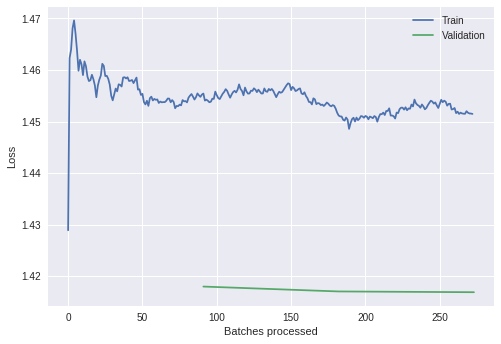

In [52]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage1')
data.save()

In [0]:
learn.unfreeze()

In [55]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,1.449382,1.412179,0.671497,0.214894,13:24
1,1.441257,1.407540,0.667296,0.222894,13:46
2,1.436857,1.406756,0.669268,0.223164,13:56


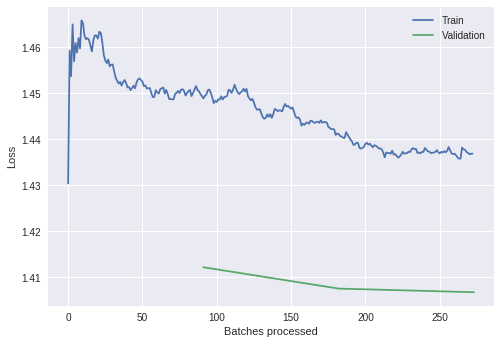

In [56]:
learn.recorder.plot_losses()

In [58]:
learn.fit_one_cycle(7, [1e-6,1e-5,1e-3])

epoch,train_loss,valid_loss,error_rate,kappa_score,time
0,1.431561,1.402670,0.662408,0.229746,13:58
1,1.420139,1.398113,0.654519,0.248791,13:41
2,1.406657,1.394301,0.652547,0.255345,13:38
3,1.391915,1.389629,0.651689,0.261585,13:37
4,1.377388,1.384869,0.647316,0.264931,13:32
5,1.363375,1.382777,0.640713,0.270591,13:14
6,1.361168,1.382507,0.641742,0.271607,12:54


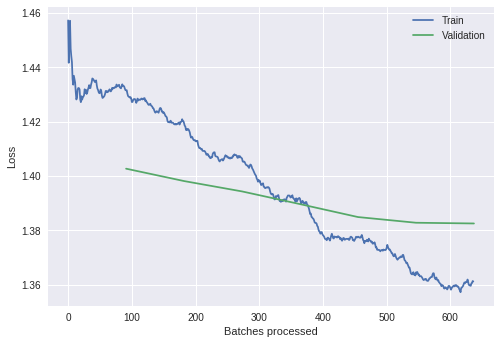

In [59]:
learn.recorder.plot_losses()

In [0]:
learn.save('overfit1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)


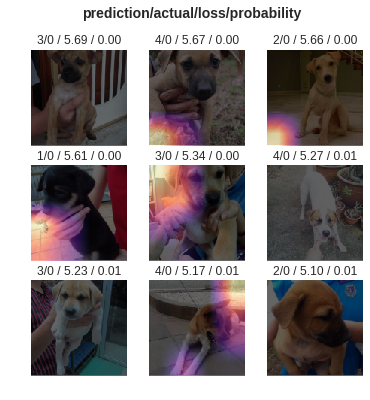

In [62]:
interp.plot_top_losses(9, figsize=(6,6))


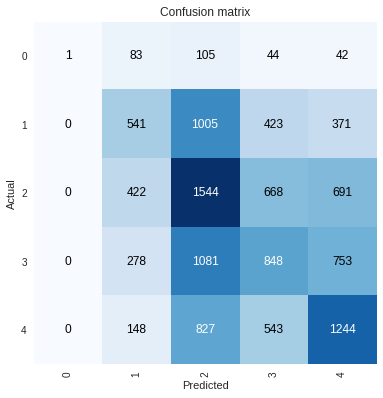

In [63]:
interp.plot_confusion_matrix()


In [64]:
df_train = pd.read_csv(path_train/'train.csv')
df_train.shape

(14993, 24)

In [65]:
df_test = pd.read_csv(path_test/'test.csv')
df_test.shape

(3948, 23)

**Using Fastai Tabular**

In [68]:
os.listdir(path_train_sentiment)

[]

In [71]:
import json
from pprint import pprint

tuplist = []
for filename in os.listdir(path_train_sentiment):
    if filename.endswith(".json"):
      with open(path_train_sentiment/filename) as f:
        data = json.load(f)
        tuplist.append( (filename[:-5], data['documentSentiment']['magnitude'], data['documentSentiment']['score']) )

tuplist[0]

('e6ff63097', 1.2, 0.3)

In [72]:
df_sent = pd.DataFrame(tuplist, columns=['PetID', 'magnitude', 'score'])
df_sent.head()

,PetID,magnitude,score
0,e6ff63097,1.2,0.3
1,14831f659,0.4,-0.4
2,065906a54,1.7,0.2
3,03aae5768,1.1,0.5
4,e4dd90768,2.9,0.5


In [0]:
df_train_sent = pd.merge(df_train, df_sent, how='left', on='PetID')
df_train_sent.shape

In [0]:
df_train_sent.head()

In [0]:
# Add in Description Length Column
alist = []
for i in range(len(df_train_sent)):
    alist.append(len(str(df_train_sent.iloc[i]['Description'])))
# Create a column from the list
df_train_sent['desc_len'] = alist
df_train_sent.head()

In [0]:
import pprint as pp
with open(path/'train_metadata'/'000fb9572-6.json') as f:
    data = json.load(f)
    x = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['x']
    y = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['y']
    string = '000fb9572-6.json'
    a = string.find('-')
    print(string[:string.find('-')])
#     pp.pprint(data)
#     pp.pprint(x)
#     pp.pprint(y)

In [0]:
# get train image metadata
path_train_img_meta = path/'train_metadata'

tuplist = []
for filename in os.listdir(path_train_img_meta):
    if filename.endswith(".json"):
      with open(path_train_img_meta/filename) as f:
        data = json.load(f)
        x = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['x']
        y = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['y']        
        tuplist.append( (filename[:filename.find('-')], x, y) )

tuplist[0]

In [0]:
df_meta = pd.DataFrame(tuplist, columns=['PetID', 'vert_x', 'vert_y'])
df_meta.head().transpose()

In [0]:
# aggregate training data
grouped1 = df_meta.groupby('PetID',as_index=False)['vert_x', 'vert_y'].agg({'vert_min':'min', 'vert_max':'max', 
                                                                               'vert_mean':'mean'})

grouped1.head().transpose()

In [0]:
grouped1.columns = ['PetID','PetID1','vert_x_min','vert_y_min','PetID2','vert_x_max','vert_y_max','PetID3','vert_x_mean','vert_y_mean']
grouped1['vert_x_mean'] = grouped1['vert_x_mean'].apply(lambda x: int(round(x)))
grouped1['vert_y_mean'] = grouped1['vert_y_mean'].apply(lambda x: int(round(x)))
grouped1 = grouped1[['PetID','vert_x_mean','vert_y_mean']]
grouped1.head().transpose()

In [0]:
grouped1.shape

In [0]:
df_train_meta = pd.merge(df_train_sent, grouped1, how='left', on='PetID')
df_train_meta.shape

In [0]:
df_train_meta.head().transpose()

In [0]:
# for test data
import json
from pprint import pprint

tuplist = []
for filename in os.listdir(path_test_sentiment):
    if filename.endswith(".json"):
      with open(path_test_sentiment/filename) as f:
        data = json.load(f)
        tuplist.append( (filename[:-5], data['documentSentiment']['magnitude'], data['documentSentiment']['score']) )

tuplist[0]

In [0]:
df_sent = pd.DataFrame(tuplist, columns=['PetID', 'magnitude', 'score'])
df_sent.head()

In [0]:
df_test_sent = pd.merge(df_test, df_sent, how='left', on='PetID')
df_test_sent.shape

In [0]:
alist = []
for i in range(len(df_test_sent)):
    alist.append(len(str(df_test_sent.iloc[i]['Description'])))
# Create a column from the list
df_test_sent['desc_len'] = alist
df_test_sent.head()

In [0]:
df_test_sent.head().transpose()

In [0]:
# get test image metadata
path_test_img_meta = path/'test_metadata'

tuplist = []
for filename in os.listdir(path_test_img_meta):
    if filename.endswith(".json"):
      with open(path_test_img_meta/filename) as f:
        data = json.load(f)
        x = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['x']
        y = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['y']        
        tuplist.append( (filename[:filename.find('-')], x, y) )

tuplist[0]

In [0]:
df_test_meta = pd.DataFrame(tuplist, columns=['PetID', 'vert_x', 'vert_y'])
df_test_meta.head()

In [0]:
# aggregate test image metadata
grouped1 = df_test_meta.groupby('PetID',as_index=False)['vert_x', 'vert_y'].agg({'vert_min':'min', 'vert_max':'max', 
                                                                               'vert_mean':'mean'})
grouped1.head()

In [0]:
grouped1.columns = ['PetID','PetID1','vert_x_min','vert_y_min','PetID2','vert_x_max','vert_y_max','PetID3','vert_x_mean','vert_y_mean']
grouped1 = grouped1[['PetID','vert_x_min','vert_y_min','vert_x_max','vert_y_max','vert_x_mean','vert_y_mean']]
grouped1.head()

In [0]:
df_test_meta = pd.merge(df_test_sent, grouped1, how='left', on='PetID')
df_test_meta.shape

In [0]:
# list(df_train_meta.columns.values)
# for col in df_train_meta:
#     print( col, ": ", len(df_train_meta[col].unique()) )

In [0]:
dep_var = 'AdoptionSpeed'
cat_names = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
             'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 
             'State', 'VideoAmt', 'PhotoAmt'] 
cont_names = ['Age', 'Fee', 'magnitude', 'score', 'desc_len', 'vert_x_mean', 'vert_y_mean']
procs = [FillMissing, Categorify, Normalize]

In [0]:
data = (TabularList.from_df(df_train_meta, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.2, seed=420)
                           .label_from_df(cols=dep_var)
                          .add_test(TabularList.from_df(df_test_meta, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs))
                           .databunch())

In [0]:
data.show_batch(rows=10)

In [0]:
kappa = KappaScore()
kappa.weights = "quadratic"

In [0]:
learn = tabular_learner(data, layers=[1000, 500], ps=[0.001,0.01], emb_drop=0.1, metrics=[accuracy, kappa])

In [0]:
learn.fit_one_cycle(5, 1e-2)

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, 1e-5)

In [0]:
# get predictions for test data
test_preds=learn.get_preds(DatasetType.Test)

In [0]:
df_test_meta["AdoptionSpeed"] = test_preds[0].argmax(dim=1)
result = df_test_meta[["PetID","AdoptionSpeed"]]
result.head()

In [0]:
result.to_csv("submission.csv", index=False)

In [0]:
result.describe()

In [0]:
print(os.listdir("./"))